## Using OpenAI API.

    While accessing ChatGPT through the OpenAI portal is engaging, you can also interact with it programmatically using their API. Let’s use an API key and handle everything directly in Python!

## Install and import modules

In [2]:
try:
    import openai
except ImportError:
    !pip install openai

In [3]:
%load_ext autoreload
%autoreload 2

In [50]:
import pprint
import logging
import os
import urllib
from PIL import Image
import matplotlib.pyplot as plt
import io
from typing import List, Tuple, Dict

### Getting ready
1. First go to the OpenAI website, signing up for an account, and obtaining an API key from the View API Keys section.
2. Set your API key as an environment variable.

In [64]:
os.environ["OPENAI_API_KEY"] = "<your_api_key_here>"

## Question answering using ChatGPT Agent ##

In [14]:
# Create an agent.
agent = openai.OpenAI()

In [15]:
# Example function for querying the assistant
def get_assistant_response(
    model: str, 
    messages: List[Dict[str, str]], 
    temperature: float = 0.7, 
    max_tokens: int = 150
) -> str:
    """
    Queries the OpenAI API to get a response from the assistant.

    param model: model to use, e.g., "gpt-4".
    param messages: list of messages defining the conversation.
    param temperature: sampling temperature, controls randomness.
    param max_tokens: maximum number of tokens for the response.

    Returns: assistant's response.
    """
    response = agent.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens
    )
    return response.choices[0].message.content


In [18]:
# Example scenario: Customer inquiry about product return policy
messages = [
    {"role": "system", "content": "You are a friendly and professional customer support assistant."},
    {"role": "user", "content": "Hi, I need to return a product I purchased last week. Can you tell me the process?"}
]

response  = get_assistant_response(
    model="gpt-4o-mini",  # Use a robust model for nuanced conversations
    messages=messages
)

print("Assistant's Response:")
print(response)

Assistant's Response:
Of course! To assist you better, could you please provide me with a few details? Specifically, the product you want to return and the store or website where you made the purchase. Generally, the return process involves the following steps:

1. **Check the Return Policy**: Most retailers have specific return policies regarding the time frame and condition of the product.

2. **Prepare Your Return**: Make sure the product is in its original packaging, including all accessories, manuals, and any free gifts you may have received.

3. **Locate Your Receipt**: Having your receipt or order confirmation can streamline the process.

4. **Initiate the Return**: Depending on the retailer, you may need to return the item in-store or ship it


In [20]:
# Escalation for complex issues
follow_up = [
    {"role": "system", "content": "You are a customer support assistant. If the issue is complex, provide a response and escalate to a human agent."},
    {"role": "user", "content": "The product I received is damaged, and I need it replaced immediately."}
]

response = get_assistant_response(
    model="gpt-4o-mini",
    messages=follow_up,
    temperature=0.6
)

print("\nEscalation Scenario:")
print(response)


Escalation Scenario:
I'm sorry to hear that you received a damaged product. I understand how frustrating that can be. To assist you further, could you please provide me with the following information:

1. Order number
2. Description of the damage
3. Any photos of the damaged product (if available)

Once I have this information, I can help you initiate the replacement process. If the situation is complex, I will escalate it to a human agent for further assistance.


### Coding Assistant

In [44]:
def query_coding_agent(task: str, model_name: str = "gpt-4o-mini") -> str:
    """
    Interacts with the coding assistant to complete a given task.
    
    param task: detailed description of the coding task or question.
    param model_name: name of the model to use.

    Returns: assistant's response.
    """
    try:
        # Step 1: Create the coding assistant
        coding_agent = agent.beta.assistants.create(
            model=model_name,
            name="Coding Assistant",
            description="An AI assistant skilled in programming, debugging, and code documentation.",
            instructions="You are a helpful coding assistant. You are an expert in Python, JavaScript, and debugging common errors. Assist the user by generating code snippets, fixing errors, and explaining concepts in simple terms."
        )
    
        # Step 2: Create a thread for the task (conversation with the assistant)
        thread = agent.beta.threads.create()

        # Step 3: Send the coding task to the assistant
        message = agent.beta.threads.messages.create(
            thread_id=thread.id,
            role="user",
            content=task
        )

        # Step 4: Run the assistant to execute the task and get the response
        run = agent.beta.threads.runs.create_and_poll(
            thread_id=thread.id,
            assistant_id=coding_agent.id,
            instructions="Please respond with the solution to the user's coding problem."
        )

        # Step 5: Check if the task was completed and retrieve the assistant's response
        if run.status == 'completed':
            messages = agent.beta.threads.messages.list(
                thread_id=thread.id
            )
            # Return the first message from the assistant's response
            return messages.data[0].content[0].text.value
        else:
            return f"Task not completed. Status: {run.status}"

    except Exception as e:
        return f"An error occurred: {str(e)}"

### Example: Generating a Python function

In [45]:
task_description = "Write a Python function to calculate the factorial of a number using recursion."
response = query_coding_agent(task_description)
print("Response from Coding Agent:")
print(response)

Response from Coding Agent:
Certainly! Here’s a Python function that calculates the factorial of a number using recursion:

```python
def factorial(n):
    # Check if the input is a non-negative integer
    if n < 0:
        raise ValueError("Factorial is not defined for negative numbers.")
    elif n == 0 or n == 1:
        return 1  # Base case: factorial of 0 or 1 is 1
    else:
        return n * factorial(n - 1)  # Recursive case

# Example usage:
try:
    number = 5
    result = factorial(number)
    print(f"The factorial of {number} is {result}.")
except ValueError as e:
    print(e)
```

### Explanation:
- The function `factorial(n)` checks if `n` is negative; if so, it raises a `ValueError` because factorial is not defined for negative numbers.
- It also handles the base cases: when `n` is 0 or 1, it returns 1.
- For other positive integers, it calls itself with the argument `n-1` and multiplies `n` by the result of that call, effectively calculating the factorial. 

You can c

### Example: Advanced Features

Expand the assistant’s capabilities:
#### Debugging Errors

Provide a code snippet with an error and ask for fixes.

In [46]:
debug_task = """
Here is my code:
def add_numbers(a, b):
print(a + b)

I'm getting an IndentationError. Can you fix it?
"""
debug_response = query_coding_agent(debug_task)
print("Debugging Response:")
print(debug_response)


Debugging Response:
The `IndentationError` in your code is occurring because the `print` statement is not properly indented inside the `add_numbers` function. In Python, the body of a function must be indented consistently. Here’s the corrected version of your code:

```python
def add_numbers(a, b):
    print(a + b)
```

Make sure to maintain consistent indentation (usually 4 spaces or a tab) throughout your code. You can then call the function like this:

```python
add_numbers(3, 5)
```

This will correctly print the sum of the two numbers.


#### Code Refactoring

Ask the assistant to optimize inefficient code.

In [47]:
refactor_task = """
Here is my code:
numbers = [1, 2, 3, 4, 5]
sum = 0
for num in numbers:
    sum += num
print(sum)

Can you refactor it to use a more Pythonic approach?
"""
refactor_response = query_coding_agent(refactor_task)
print("Refactored Code:")
print(refactor_response)

Refactored Code:
Certainly! A more Pythonic way to sum a list of numbers is to use the built-in `sum()` function. Here's your refactored code:

```python
numbers = [1, 2, 3, 4, 5]
total = sum(numbers)
print(total)
```

This version is cleaner and more concise, leveraging Python's built-in capabilities effectively. Note that I changed the variable name from `sum` to `total` to avoid shadowing the built-in `sum()` function.


### 3. Documentation Drafting

Request documentation for a given function.

In [48]:
doc_task = """
Can you write docstrings for this Python function?

def greet_user(name):
    print(f"Hello, {name}!")
"""
doc_response = query_coding_agent(doc_task)
print("Generated Docstring:")
print(doc_response)

Generated Docstring:
Certainly! Here’s a docstring for the `greet_user` function that describes its purpose, parameters, and functionality:

```python
def greet_user(name):
    """
    Greet the user by their name.

    This function takes a user's name as an argument and prints a greeting message
    to the console that includes the name provided.

    Parameters:
    name (str): The name of the user to greet.

    Returns:
    None
    """
    print(f"Hello, {name}!")
```

This docstring provides clear information about what the function does, the expected parameter, and what the function returns (in this case, nothing).


### Using DALL-E for Image Creation with OpenAI

OpenAI offers access to its DALL-E model through an API. DALL-E is a multimodal version of GPT-3, containing 12 billion parameters, designed to convert text descriptions into images. It has been trained on a vast collection of text-image pairs sourced from the web (including Wikipedia), allowing it to generate images based on written prompts. This model is accessible through the same API.

In [62]:
def generate_image(prompt: str):
    com = agent.images.generate(prompt=prompt, n=1, size="512x512")
    url = com.data[0].url
    image_data = urllib.request.urlopen(url).read()
    image_file = io.BytesIO(image_data)
    image = Image.open(image_file)
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    plt.xticks([])
    plt.yticks([])
    #Display the image
    plt.imshow(image)
    plt.show()

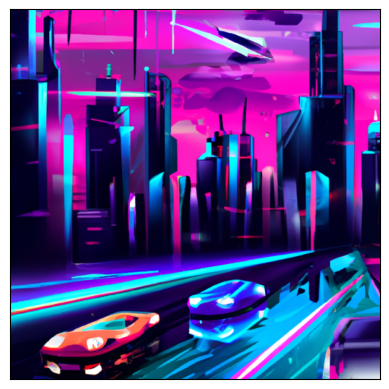

In [63]:
prompt = "A futuristic cyberpunk cityscape at night, with neon lights reflecting off wet streets, flying cars, and towering skyscrapers, in a vibrant color palette."

generate_image(prompt)